In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii
from tabulate import tabulate
import pyspherematch as sm

from astropy import units as u
from astropy.coordinates import SkyCoord, FK4, FK5

SAGA_DIR = os.environ['SAGA_DIR']
SAGA_DROPBOX= os.environ['SAGA_DROPBOX']

In [3]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.5
    plt.rcParams['font.size'] = 17.0
    plt.rcParams['font.weight'] = 'medium'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

<TableColumns names=('RA','Dec','NSAID','othername','vhelio','vhelio_err','distance','dist_2MASS_NSA','u','u_err','A_u','M_u','g','g_err','A_g','M_g','r','r_err','A_r','M_r','i','i_err','A_i','M_i','z','z_err','A_z','M_z','J','J_err','A_J','M_J','H','H_err','A_H','M_H','K','K_err','A_K','M_K')>
1492


/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


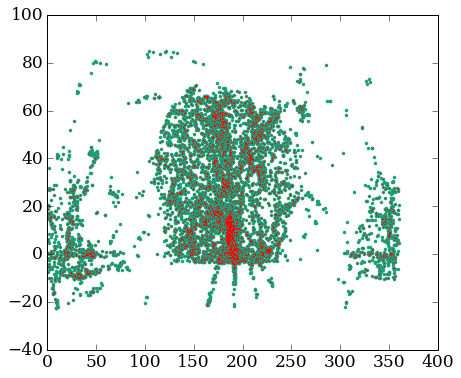

In [25]:
# READ SUBMASTER LIST 
master = Table.read(SAGA_DROPBOX+'hosts/submaster.ecsv.gz', format='ascii.ecsv')
gr_master = master['M_g'] - master['M_r']
print master.columns

# CALC NUMBER OF BRIGHT THINGS for Sect 2.1
m1=master['M_K'] < -19.6
m2=master['vhelio'] < 3000
m3=master['distance'] < 40.
m4 = master['dist_2MASS_NSA'] < 20.
print np.sum(m1&m2&m3&m4)
#print np.max(master['vhelio'][m3&m4])/3e5
plt.plot(master['RA'],master['Dec'],'.')
plt.plot(master['RA'][~m4],master['Dec'][~m4],'r.',ms=1)

In [19]:
# MATCH COMPLETE HOSTS AND PROPOSED HOSTS IN SUBMASTER LIST
complete_hosts =[147100,166313,165536,61945,149781,33446,150887,132339]
partial_hosts = [85746,140594,161174,13927,137625,129237]

hosts = np.in1d(master['NSAID'], complete_hosts)
part = np.in1d(master['NSAID'], partial_hosts)


In [20]:
# FIND FLAG0 GALAXIES
file = SAGA_DROPBOX + 'hosts/host_catalog_flag0.csv'
all_flag0 = ascii.read(file, format='csv')
flag0 = np.in1d(master['NSAID'][m4],all_flag0['NSAID'])

print np.sum(flag0)

74


In [1]:
# MILKY WAY PROPERTIES
MK_MW2     = -24.0   # 
MK_MW_err2 = 0.3
MK_MW1     = -24.2   # 
MK_MW_err1 = 0.2


Mr_MW     = -21. + 5.*np.log10(0.7)
Mr_MW_err = 0.38


gr_MW     = 0.682   # DIRECTLY FROM LICQUIA
gr_MW_err = 0.066

################
Mr_MW_vdk = -20.7 + 5.*np.log10(0.7)
Mr_MW_err_vdk = 0.3
print Mr_MW_vdk


gr_MW_vdk = 0.75
gr_MW_err_vdk = 0.19

-21.4745097999


In [7]:
# M31 PROPERTIES
MK_M31 = -24.5-0.188   # HAMMER 2001
Mr_M31 = -22.0
gr_M31 = 0.701

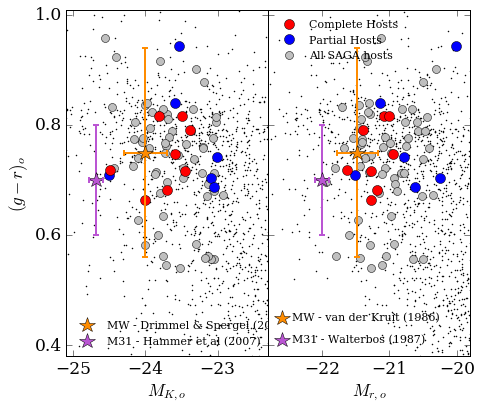

In [8]:
# PLOT MK VS. RI
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
plt.rcParams['figure.figsize'] = 10, 5

ax1.plot(master['M_K'],gr_master, 'k.',ms=2,label='_nolegend_')
ax1.plot(master['M_K'][flag0],gr_master[flag0], 'ko',color = '0.75',label='_nolegend_',ms=8)
ax1.plot(master['M_K'][part],gr_master[part], 'bo',label='_nolegend_',ms=10)
ax1.plot(master['M_K'][hosts],gr_master[hosts], 'ro',label='_nolegend_',ms=10)



#MW
#ax1.errorbar([MK_MW1],[gr_MW_vdk],xerr=[Mr_MW_err_vdk],yerr=[gr_MW_err_vdk],ecolor='#ff6347',capthick=2,linewidth=2,zorder=3)
ax1.errorbar([MK_MW2],[gr_MW_vdk],xerr=[MK_MW_err2],yerr=[gr_MW_err_vdk],color='#ff8c00',capthick=2,linewidth=2,zorder=3)
#ax1.plot([MK_MW1],[gr_MW_vdk],'y*',markersize=16,color='#ff6347',label='MW - Just et al (2015)',zorder=4)
ax1.plot([MK_MW2],[gr_MW_vdk],'y*',markersize=16,color='#ff8c00',label='MW - Drimmel & Spergel (2001)',zorder=4)

ax1.plot([MK_M31],[gr_M31],'y*',markersize=16,color='#ba55d3',label='M31 - Hammer et al (2007)',zorder=4)
ax1.errorbar([MK_M31],[gr_M31],xerr=[0.1],yerr=[0.1],color='#ba55d3',capthick=2,linewidth=2,zorder=4)

ax1.set_ylim(0.38, 1.01)
ax1.set_xlim(-25.1,-22.3)
ax1.set_ylabel('$(g-r)_o$')
ax1.set_xlabel('$M_{K,o}$')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax1.legend(fontsize=11,loc=3,numpoints = 1)


##########################################
# PLOT Mr Vs gr
ax2.plot(master['M_r'],gr_master, 'k.',ms=2,label='_nolegend_')
ax2.plot(master['M_r'][hosts],gr_master[hosts], 'ro',label='Complete Hosts',ms=10,zorder=4)
ax2.plot(master['M_r'][part],gr_master[part], 'bo',label='Partial Hosts',ms=10,zorder=3)
ax2.plot(master['M_r'][flag0],gr_master[flag0], 'ko',color = '0.75',label='All SAGA hosts',ms=8)


ax2.legend(fontsize=11,loc=2,numpoints = 1)


#MW - vdK
ax2.errorbar([Mr_MW_vdk],[gr_MW_vdk],xerr=[Mr_MW_err_vdk],yerr=[gr_MW_err_vdk],ecolor='#ff8c00',capthick=2,linewidth=2,zorder=3)
ax2.plot([Mr_MW_vdk],[gr_MW_vdk],'y*',markersize=16,color='#ff8c00',label='MW - van der Kruit (1986)',zorder=4)

ax2.plot([Mr_M31],[gr_M31],'y*',markersize=16,color='#ba55d3',label='M31 - ',zorder=4)
ax2.errorbar([Mr_M31],[gr_M31],xerr=[0.1],yerr=[0.1],color='#ba55d3',capthick=2,linewidth=2,zorder=4)

# BY HAND LEGEND
ax2.plot([-22.6],[0.45],'y*',markersize=16,color='#ff8c00')
ax2.plot([-22.6],[0.41],'y*',markersize=16,color='#ba55d3')
ax2.text(-22.45,0.445,'MW - van der Kruit (1986)',fontsize=11)
ax2.text(-22.45,0.405,'M31 - Walterbos (1987)',fontsize=11)


ax2.set_ylim(0.38, 1.01)
ax2.set_xlim(-22.8,-19.8)
ax2.set_xlabel('$M_{r,o}$')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#ax2.legend(fontsize=10,loc=3,numpoints = 1)

plt.tight_layout(w_pad=0)
plt.savefig('fig_hosts.pdf')



In [9]:
nsa = Table.read (SAGA_DIR+'/cats/nsa_v0_1_3.fits')

In [10]:
# READ IRAS FAINT SOURCE CATALOG
#  DOWNLOADED FROM 
#  http://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?mission=irsa&submit=Select&projshort=IRAS
irasp = Table.read('/Users/marlageha/Projects/SAGA/data/iras_fsc.tbl',format='ipac')

ra = 15.*(irasp['rah'] + irasp['ram']/60. + irasp['ras']/3600.)
dec = irasp['decd'] + irasp['decm']/60. + irasp['decs']/3600.
msk = irasp['decsign'] == '-'
dec[msk] = -1.*dec[msk]

# CONVERT IRAS COORDINATES FROM 1950 -> 2000!
c1 = SkyCoord(ra * u.deg, dec * u.deg, frame=FK4)
iras = c1.transform_to(FK5(equinox='J2000'))


(-10, 70)

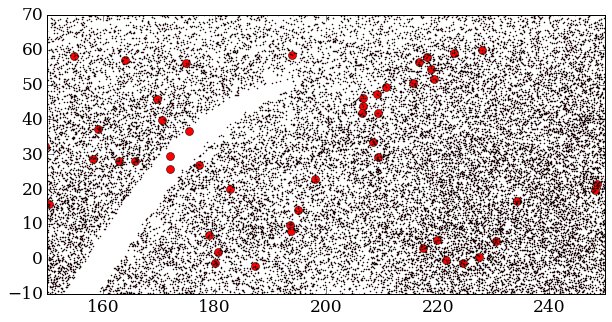

In [11]:
plt.plot(master['RA'][flag0],master['Dec'][flag0],'ro',ms=8)
plt.plot(iras.ra,iras.dec,'ro',ms=1)


plt.xlim(150,250)
plt.ylim(-10,70)


In [12]:

# MATCH TO NSA
m = (nsa['ZDIST']*(3e5) < 6000)
nsad = nsa[m]
pid1,pid2,d = sm.spherematch(nsad['RA'], nsad['DEC'],\
               iras.ra, iras.dec,\
               60./3600,nnearest=1)
nmatch = np.size((d > 0.0).nonzero())
print nmatch

F_IRAS1 = 2.58*irasp['fnu_60'] + irasp['fnu_100']
F_IRAS  = 1.26e-14 *(F_IRAS1)   # EQN 2, Kewley 2002
dist = nsad['ZDIST'][pid1]*(3e5/70.)*3.086e22
L_IRAS = 4*np.pi * dist *  F_IRAS[pid2] *1e7*dist
SFR_IRAS = 7.9e-44 * L_IRAS

pSFR_IRAS = np.log10(SFR_IRAS) 
pra = nsad['RA'][pid1]
pdec=nsad['DEC'][pid1]
pmass = np.log10(nsad['MASS'][pid1]/0.7**2)

3412


In [13]:
# HOSTS
iras = Table.read('/Users/marlageha/Projects/SAGA/data/saga_iras.dat',format='ascii')
m = np.in1d(nsa['NSAID'],iras['nsaid'])
dist = nsa['ZDIST'][m]*(3e5/70.)*3.086e22

# CALCULATE SFR
F_IRAS = 1.26e-14 *(2.58*iras['60F'] + iras['100F'] )   # EQN 2, Kewley 2002
L_IRAS = 4*np.pi * dist * F_IRAS *1e7*dist
SFR_IRAS = 7.9e-44 * L_IRAS
hSFR_IRAS = np.log10(SFR_IRAS)
hmass = np.log10(nsa['MASS'][m]/0.7**2)

n=nsa['NSAID'][m]
for (d,h,s) in zip(n,hmass,hSFR_IRAS):
    print d,h,s

61945 10.7024 -0.28994281711
149781 10.5632 -0.224771625311


In [14]:
# HOSTS - partial
iras = Table.read('/Users/marlageha/Projects/SAGA/data/saga_IRAS2.dat',format='ascii')
m = np.in1d(nsa['NSAID'],iras['nsaid'])

dist = nsa['ZDIST'][m]*(3e5/70.)*3.086e22
print nsa['NSAID'][m]


# CALCULATE SFR
F_IRAS = 1.26e-14 *(2.58*iras['60F'] + iras['100F'] )   # EQN 2, Kewley 2002
L_IRAS = 4*np.pi * dist * F_IRAS *1e7*dist
SFR_IRAS = 7.9e-44 * L_IRAS
cSFR_IRAS = np.log10(SFR_IRAS)
cmass = np.log10(nsa['MASS'][m]/0.7**2)
for n,s,m in zip(iras['nsaid'],cSFR_IRAS,nsa['NSAID'][m]):
    print n,s,m

NSAID 
------
126115
145729
126115 0.547259684017 126115
145729 0.60741980851 145729


0
0
NSAID 
------
 33446
 61945
132339
147100
149781
150887
165536
166313
0
33446 0.335730513058
61945 -0.28994281711
147100 0.772832554246
149781 -0.224771625311
150887 1.16089912881
165536 -0.529438680366
166313 0.602978022398


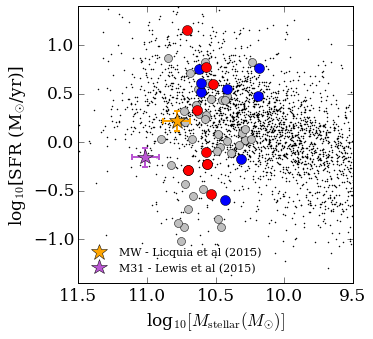

In [25]:
# PLOT SFR VS M_STELLAR
#mass = np.log10(nsa['MASS']/0.7**2)
#id1,id2,d = sm.spherematch(nsa['RA'], nsa['DEC'],\
#               pra, pdec,\
#               70./3600,nnearest=1)
#nmatch = np.size((d > 0.0).nonzero())
#print nmatch
plt.plot(pmass,pSFR_IRAS,'k.',ms=2,label='_nolegend_')


m = np.in1d(nsa['NSAID'],all_flag0['NSAID'])
flag0_nsa = nsa[m]
id1,id2,d = sm.spherematch(flag0_nsa['RA'], flag0_nsa['DEC'],\
               pra, pdec,\
               120./3600,nnearest=1)
nmatch = np.size((d > 0.0).nonzero())
print nmatch
flag0_mass = np.log10(flag0_nsa['MASS']/0.7**2)
plt.errorbar([np.log10(6.08e10)],[np.log10(1.65)],xerr=[0.1],yerr=[0.1],ecolor='#ffa500',capthick=2,linewidth=2)

plt.plot(flag0_mass[id1],pSFR_IRAS[id2],'ko',ms=8,color='0.75',label='_nolegend_')



#---------    

mpart = np.in1d(nsa['NSAID'], partial_hosts)
host_nsa = nsa[mpart]
id1,id2,d = sm.spherematch(host_nsa['RA'], host_nsa['DEC'],\
               pra, pdec,\
               120./3600,nnearest=1)
nmatch = np.size((d > 0.0).nonzero())
print nmatch
host_mass = np.log10(host_nsa['MASS']/0.7**2)
plt.plot(host_mass[id1],pSFR_IRAS[id2],'bo',ms=10,label='_nolegend_')

#------------HOSTS
mhosts = np.in1d(nsa['NSAID'], complete_hosts)

host_nsa = nsa[mhosts]
print host_nsa['NSAID']
id1,id2,d = sm.spherematch(host_nsa['RA'], host_nsa['DEC'],\
               pra, pdec,\
               120./3600,nnearest=1)
nmatch = np.size((d > 0.0).nonzero())
print nmatch
host_mass = np.log10(host_nsa['MASS']/0.7**2)
host_nsaid = host_nsa['NSAID']
plt.plot(host_mass[id1],pSFR_IRAS[id2],'ro',ms=10,label='_nolegend_')

plt.plot(cmass,cSFR_IRAS,'bo',ms=10,label='_nolegend_')
plt.plot(hmass,hSFR_IRAS,'ro',ms=10,label='_nolegend_')
for n,obj in zip(host_nsa['NSAID'][id1],pSFR_IRAS[id2]):
    print n,obj
    
    
plt.plot([10.57],[-0.1],'ro',ms=10,label='_nolegend_')

    
# 6.08 +/- 1.14 x 10^10
# 1.65 +/- 0.19 msun/year
#plt.plot([np.log10(5.1e10)],[np.log10(2)],'y*',markersize=16,color='#ffa500')

plt.plot([np.log10(6.08e10)],[np.log10(1.65)],'y*',markersize=17,color='#ffa500',label='MW - Licquia et al (2015)',zorder=4)
plt.errorbar([np.log10(6.08e10)],[np.log10(1.65)],xerr=[0.1],yerr=[0.1],ecolor='#ffa500',capthick=2,linewidth=2,zorder=3)

# M31
plt.plot([np.log10(10.3e10)],[np.log10(0.7)],'y*',markersize=16,color='#ba55d3',label='M31 - Lewis et al (2015)',zorder=4)
plt.errorbar([np.log10(10.3e10)],[np.log10(0.7)],xerr=[0.1],yerr=[0.1],ecolor='#ba55d3',capthick=2,linewidth=2,zorder=3)


#plt.plot([np.log10(5.7e10)],[np.log10(1.65)],'y*',markersize=16,color='#ffa500')

plt.ylim(-1.45,1.4)
plt.xlim(11.5,9.5)
plt.xlabel('log$_{10}[M_{\mathrm{stellar}} (M_{\odot}) ]$')
plt.ylabel('log$_{10}$[SFR (M$_{\mathrm{\odot}}$/yr)]')
plt.rcParams['figure.figsize'] = 5.5, 5

plt.legend(fontsize=11,loc=3,numpoints = 1)
plt.tight_layout(w_pad=0)
plt.savefig('fig_hosts_Mstar.pdf')